In [36]:
from collections import Counter
from nltk import ngrams
import io
import spacy
nlp = spacy.load('en', disable=['parser'])

import matplotlib.pyplot as plt
%matplotlib inline



In [40]:
words_list = []


def get_words_list_season(season):
    with io.open(r'FrendsWordsAnalysis/filtered_subtitles/s%s/s%s_all.txt' % (season, season), 'r', encoding='u8') as f:
        for line in f:
            zh, en = line.split('\b0\b1\b2---')
            doc = nlp(en)
            for token in doc:
                if token.is_punct == False and token.is_space == False:
                    words_list.append(token.text.lower())

                
get_words_list_season('01')

## N-grams

In [41]:
def analyze_ngram_season(n):
    
    ngrams_result = ngrams(words_list, n)
    cnt = Counter(ngrams_result)
    key_to_del = []
    for k in cnt.keys():
        # remove the key where all the elements are the same. su
        s = set(k)
        if len(s) == 1:
            key_to_del.append(k)
    for key in key_to_del:
        del cnt[key]

    print(cnt.most_common(50))
    return cnt 

## drawing plot by matplotlib

[(('i', 'do', "n't"), 202), (('do', "n't", 'know'), 101), (('i', 'ca', "n't"), 76), (('oh', 'my', 'god'), 66), (('i', "'m", 'not'), 66), (('i', "'m", 'sorry'), 64), (('you', 'do', "n't"), 61), (('gon', 'na', 'be'), 56), (('what', 'are', 'you'), 55), (('it', "'s", 'just'), 52), (('what', 'do', 'you'), 50), (('i', "'m", 'gon'), 47), (("'m", 'gon', 'na'), 47), (('you', 'know', 'what'), 45), (("'re", 'gon', 'na'), 41), (('you', 'know', 'i'), 38), (('it', "'s", 'not'), 37), (('it', "'s", 'a'), 36), (('ca', "n't", 'believe'), 36), (('i', 'know', 'i'), 32), (('you', "'re", 'gon'), 31), (('do', "n't", 'have'), 28), (('you', "'re", 'not'), 27), (('you', 'gon', 'na'), 27), (('are', 'you', 'doing'), 27), (('i', "'m", 'fine'), 27), (('do', 'you', 'think'), 26), (('you', 'know', 'it'), 26), (('no', 'i', "'m"), 26), (('do', "n't", 'want'), 25), (('it', "'s", 'like'), 25), (("'s", 'gon', 'na'), 25), (('do', "n't", 'think'), 25), (('all', 'right', 'i'), 25), (('i', 'did', "n't"), 24), (('no', 'it', "'

["i do n't", "do n't know", "i ca n't", 'oh my god', "i 'm not", "i 'm sorry", "you do n't", 'gon na be', 'what are you', "it 's just", 'what do you', "i 'm gon", "'m gon na", 'you know what', "'re gon na"]

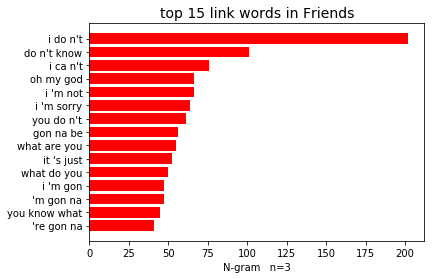

In [43]:

def plot_barh(N, top_n):
    cnt = analyze_ngram_season(N)
    topn_list = cnt.most_common(top_n)
    topn_link_tokens = [' '.join(x[0]) for x in topn_list]
    print(topn_link_tokens)
    topn_num = [x[1] for x in topn_list]
    y_pos = range(len(topn_link_tokens))
    fig, ax = plt.subplots()
    ax.barh(y_pos, topn_num, color='red', align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(topn_link_tokens)
    ax.invert_yaxis()
    ax.set_xlabel('N-gram   n=%s' % N)
    ax.set_title("top %s link words in Friends"% top_n, fontsize=14)

N = 5; top_n = 10
plot_barh(3, 15)
